In [1]:
import numpy as np
import operator

# kNN 分类算法

## 建立数据集

In [2]:
def createDataSet():
    group = np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group, labels

In [3]:
group, labels = createDataSet()
group, labels

(array([[1. , 1.1],
        [1. , 1. ],
        [0. , 0. ],
        [0. , 0.1]]),
 ['A', 'A', 'B', 'B'])

## 将数据集进行分类

In [4]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()     
    classCount = {}          
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

## 使用数据 [0,0] 测试分类

In [5]:
classify0([0, 0], group, labels, 3)

'B'

# 示例：约会网站配对效果

In [6]:
def file2matrix(filename):
    fr = open(filename)
    arrayOfLines = fr.readlines()
    numberOfLines = len(arrayOfLines)
    returnMat = np.zeros((numberOfLines, 3))
    classLabelVector = []
    index = 0
    for line in arrayOfLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index, :] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat, classLabelVector

In [7]:
datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
datingDataMat, datingLabels[0:20]

(array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
        [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
        [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
        ...,
        [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
        [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
        [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]]),
 [3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3])

## 绘制数据散点图

### 配置 figure 大小与 dpi

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 5]
plt.rcParams['figure.dpi'] = 100

### 绘制第二列与第三列数据散点图

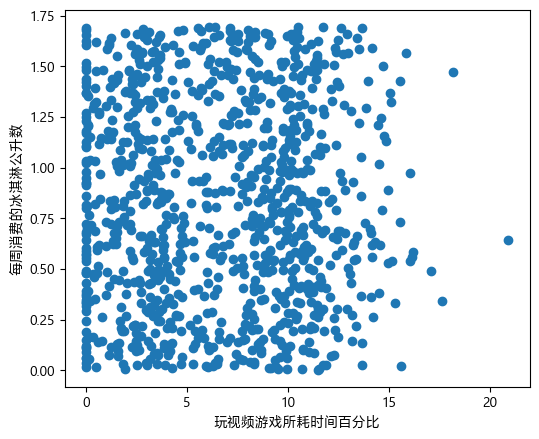

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.rc('font', family = 'Microsoft Yahei')
ax.scatter(datingDataMat[:, 1], datingDataMat[:, 2])
plt.xlabel('玩视频游戏所耗时间百分比')
plt.ylabel('每周消费的冰淇淋公升数')
plt.show()

### 绘制第二列与第三列数据散点图，并按照喜好程度分类显示

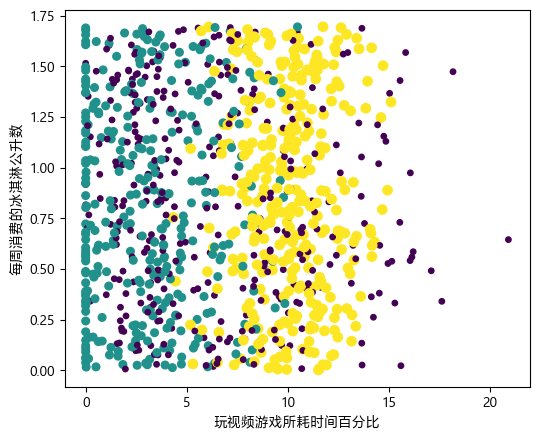

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.rc('font', family = 'Microsoft Yahei')
ax.scatter(datingDataMat[:, 1], datingDataMat[:, 2], 15.0 * np.array(datingLabels), 15.0 * np.array(datingLabels))
plt.xlabel('玩视频游戏所耗时间百分比')
plt.ylabel('每周消费的冰淇淋公升数')
plt.show()

### 绘制第一列与第二列数据散点图，并按照喜好程度分类显示

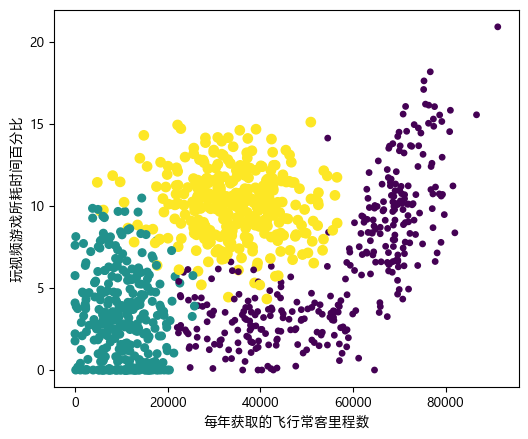

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
p1 = ax.scatter(datingDataMat[:, 0], datingDataMat[:, 1], 15.0 * np.array(datingLabels), 15.0 * np.array(datingLabels))
plt.xlabel('每年获取的飞行常客里程数')
plt.ylabel('玩视频游戏所耗时间百分比')
plt.show()

## 特质变量归一化
由于飞行常客里程数远远大于其他两类特征数据，但是这三类特征数据是同等重要的，因此需要进行归一化处理。

In [13]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    normDataSet = normDataSet / np.tile(ranges, (m, 1))
    return normDataSet, ranges, minVals

In [14]:
normMat, ranges, minVals = autoNorm(datingDataMat)
normMat, ranges, minVals

(array([[0.44832535, 0.39805139, 0.56233353],
        [0.15873259, 0.34195467, 0.98724416],
        [0.28542943, 0.06892523, 0.47449629],
        ...,
        [0.29115949, 0.50910294, 0.51079493],
        [0.52711097, 0.43665451, 0.4290048 ],
        [0.47940793, 0.3768091 , 0.78571804]]),
 array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00]),
 array([0.      , 0.      , 0.001156]))

## 测试算法：作为完整程序验证分类器

In [15]:
def datingClassTest():
    hoRatio = 0.10  # hold out 10%
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')  # load data setfrom file
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m * hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i, :], normMat[numTestVecs:m, :], datingLabels[numTestVecs:m], 3)
        if classifierResult != datingLabels[i]:
            print('error, the classifier came back with:', classifierResult, 'the real answer is:', datingLabels[i])
            errorCount += 1.0
    print('the total error rate is:', errorCount / float(numTestVecs))
    print(errorCount)

In [16]:
datingClassTest()

error, the classifier came back with: 3 the real answer is: 2
error, the classifier came back with: 3 the real answer is: 1
error, the classifier came back with: 3 the real answer is: 1
error, the classifier came back with: 2 the real answer is: 3
error, the classifier came back with: 3 the real answer is: 1
the total error rate is: 0.05
5.0


# 示例：手写识别系统

In [17]:
def img2vector(filename):
    returnVect = np.zeros((1, 1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0, 32 * i + j] = int(lineStr[j])
    return returnVect

In [18]:
testVector = img2vector('testDigits/0_13.txt')
testVector[0, 0:31]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
from os import listdir
def handwritingClassTest():
    hwLabels = []
    trainingFileList = listdir('trainingDigits')  # load the training set
    m = len(trainingFileList)
    trainingMat = np.zeros((m, 1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]  # take off .txt
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i, :] = img2vector('trainingDigits/%s' % fileNameStr)
    testFileList = listdir('testDigits')  # iterate through the test set
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]  # take off .txt
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        if classifierResult != classNumStr:
            print("error, the classifier came back with:", classifierResult, "the real answer is: ", classNumStr)
            errorCount += 1.0
    print("the total number of errors is: ", errorCount)
    print("the total error rate is: ", errorCount / float(mTest))

In [20]:
handwritingClassTest()

error, the classifier came back with: 7 the real answer is:  1
error, the classifier came back with: 9 the real answer is:  3
error, the classifier came back with: 3 the real answer is:  5
error, the classifier came back with: 6 the real answer is:  5
error, the classifier came back with: 6 the real answer is:  8
error, the classifier came back with: 3 the real answer is:  8
error, the classifier came back with: 1 the real answer is:  8
error, the classifier came back with: 1 the real answer is:  8
error, the classifier came back with: 1 the real answer is:  9
error, the classifier came back with: 7 the real answer is:  9
the total number of errors is:  10.0
the total error rate is:  0.010570824524312896
